# PHASE 2 PROJECT

## Business Objective:

Your company is launching a movie studio. You have been tasked with analyzing current trends in movies to provide 3 actionable recommendations for what types of movies the studio should produce.

### 1. Key Business Questions:

What genres tend to perform best at the box office?

Do critic ratings predict box office success?

How do budget levels correlate with box office revenue?

### 2. Data Loading and Initial Exploration
Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pandas as pd
import re

### Load Datasets

In [7]:
# Load the CSV file
file_path = "tmdb.movies.csv"
df = pd.read_csv(file_path)


In [8]:
#BOM movie gross CSV
df_movies= pd.read_csv('tmdb.movies.csv')
df_movies.head(50)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


# Display Data according corresponding to the movies title

In [ ]:
# TheMovieDB movies (CSV)
df_tmdb = pd.read_csv('tmdb.movies.csv')
df_tmdb.head()

In [11]:
# Display only the movie titles and their corresponding vote counts
movies_votes = df[['title', 'vote_count', 'release_date']]
movies_votes.head(10)  # Display first 10 for preview

,title,vote_count,release_date
0,Harry Potter and the Deathly Hallows: Part 1,10788,2010-11-19
1,How to Train Your Dragon,7610,2010-03-26
2,Iron Man 2,12368,2010-05-07
3,Toy Story,10174,1995-11-22
4,Inception,22186,2010-07-16
5,Percy Jackson & the Olympians: The Lightning T...,4229,2010-02-11
6,Avatar,18676,2009-12-18
7,Toy Story 3,8340,2010-06-17
8,Despicable Me,10057,2010-07-09
9,Megamind,3635,2010-11-04


# Drop the Unnamed: 0 column

In [17]:
import pandas as pd

# Load your CSV
df = pd.read_csv("tmdb.movies.csv")

# Display columns before dropping
print("Before dropping:", df.columns.tolist())

# Drop the column
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Display columns after dropping
print("After dropping:", df.columns.tolist())


Before dropping: ['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count']
After dropping: ['genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count']


# Check for missing values
### What this does:
##### Loads the CSV.

##### Removes the unnecessary Unnamed: 0 column.

##### Checks for missing (NaN) values in each column.

##### Prints only the columns that have missing values and how many are missing.

In [18]:
import pandas as pd

# Load your dataset
df = pd.read_csv("tmdb.movies.csv")

# Drop 'Unnamed: 0' if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Check for missing values in each column
missing_values = df.isnull().sum()

# Display missing values only for columns that have them
missing_values = missing_values[missing_values > 0]

print("Missing Values per Column:\n")
print(missing_values)


Missing Values per Column:

Series([], dtype: int64)


# Check data types and fix if necessary

In [14]:
# Check data types
data_types = df.dtypes

# summary statistics

# TMDb Movies: Exploratory Data Analysis (EDA)

## 📦 Overview
This notebook performs an **end-to-end exploratory analysis** of the **`tmdb.movies.csv`** dataset (~26,500 entries). It includes:

1. Converting `release_date` to a `datetime`
2. Parsing the `genre_ids` column
3. Visualizing:
   - Ratings (`vote_average`)
   - Vote counts (`vote_count`)
   - Popularity (`popularity`)
   - Most frequent genres and their trends over time

---

## 🗂️ Dataset Snapshot

| Column              | Description                                |
|---------------------|--------------------------------------------|
| `id`                | TMDb movie ID                              |
| `title`             | Movie title                                |
| `original_language` | ISO-639-1 language code                    |
| `release_date`      | Release date (to convert to datetime)     |
| `genre_ids`         | List of numeric genre IDs                 |
| `vote_average`      | Average rating (0–10)                      |
| `vote_count`        | Number of user votes                       |
| `popularity`        | Popularity score (continuous float)        |

---


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import ast

# Step 1: Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')




In [21]:
# Step 2: Parse genre_ids from string to list
df['genre_ids'] = df['genre_ids'].apply(ast.literal_eval)



In [26]:
# Step 3: Basic statistics
summary_stats = {
    "Vote Average": {
        "Mean": df['vote_average'].mean(),
        "Min": df['vote_average'].min(),
        "Max": df['vote_average'].max()
    },
    "Vote Count": {
        "Mean": df['vote_count'].mean(),
        "Max": df['vote_count'].max()
    },
    "Popularity": {
        "Mean": df['popularity'].mean(),
        "Max": df['popularity'].max()
    },
    "Most Common Title": df['title'].mode()[0]
}

summary_stats

{'Vote Average': {'Mean': 5.991281064977184, 'Min': 0.0, 'Max': 10.0},
 'Vote Count': {'Mean': 194.22483689708488, 'Max': 22186},
 'Popularity': {'Mean': 3.130912244974922, 'Max': 80.773},
 'Most Common Title': 'Eden'}

In [23]:
# Step 4: Genre frequency analysis
from collections import Counter

all_genres = df['genre_ids'].explode()
genre_counts = Counter(all_genres)
genre_freq_df = pd.DataFrame(genre_counts.items(), columns=['Genre ID', 'Count']).sort_values(by='Count', ascending=False)



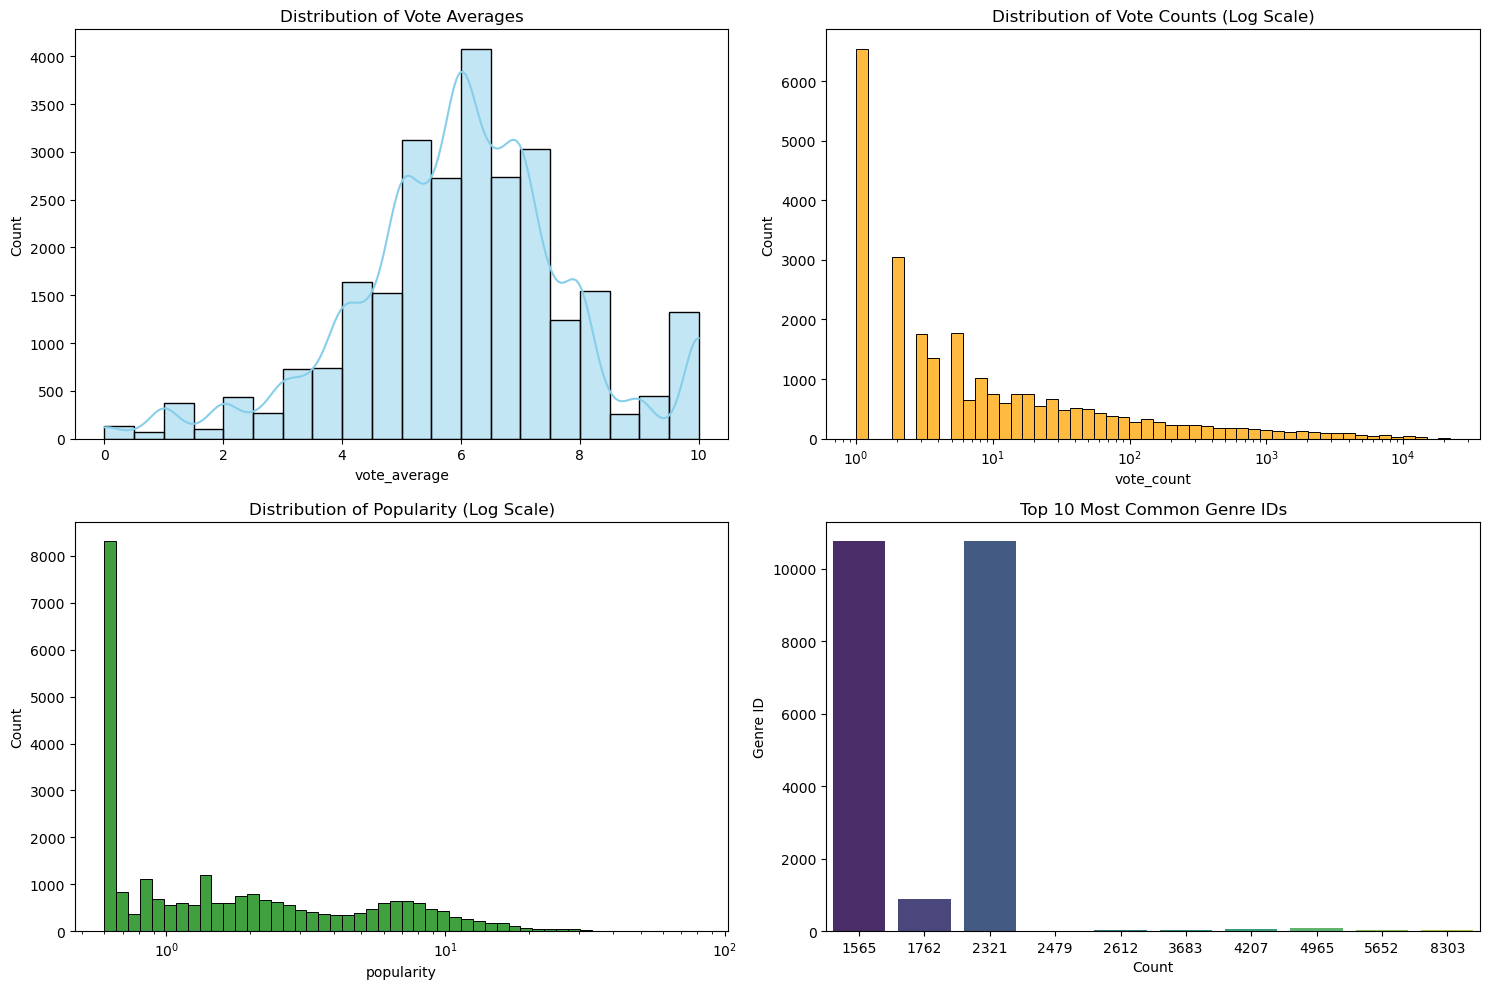

({'Vote Average': {'Mean': 5.991281064977184, 'Min': 0.0, 'Max': 10.0},
  'Vote Count': {'Mean': 194.22483689708488, 'Max': 22186},
  'Popularity': {'Mean': 3.130912244974922, 'Max': 80.773},
  'Most Common Title': 'Eden'},
     Genre ID  Count
 10      18.0   8303
 6       35.0   5652
 18      99.0   4965
 7       53.0   4207
 8       27.0   3683
 4       28.0   2612
 19       NaN   2479
 11   10749.0   2321
 5      878.0   1762
 2    10751.0   1565)

In [24]:
# Step 5: Plotting distributions
plt.figure(figsize=(15, 10))

# Vote Average Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['vote_average'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Vote Averages')

# Vote Count Distribution (log scale for skewed data)
plt.subplot(2, 2, 2)
sns.histplot(df['vote_count'], bins=50, log_scale=True, color='orange')
plt.title('Distribution of Vote Counts (Log Scale)')

# Popularity Distribution (log scale)
plt.subplot(2, 2, 3)
sns.histplot(df['popularity'], bins=50, log_scale=True, color='green')
plt.title('Distribution of Popularity (Log Scale)')

# Top 10 Genres by Frequency
plt.subplot(2, 2, 4)
sns.barplot(x='Count', y='Genre ID', data=genre_freq_df.head(10), palette='viridis')
plt.title('Top 10 Most Common Genre IDs')

plt.tight_layout()
plt.show()

summary_stats, genre_freq_df.head(10)

### Vote Average Distribution

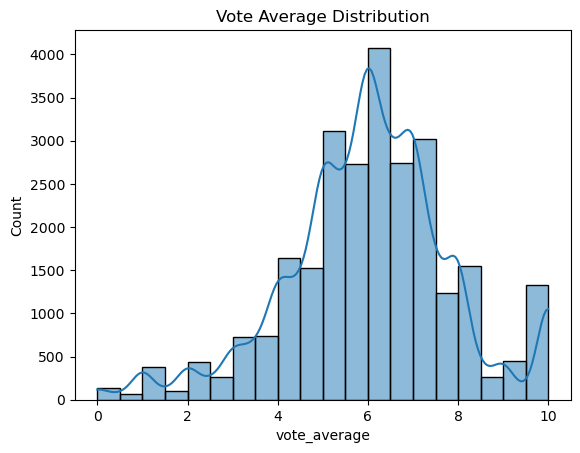

In [29]:
sns.histplot(df.vote_average, bins=20, kde=True)
plt.title("Vote Average Distribution")
plt.show()


### Vote Count Distribution (Log Scale)

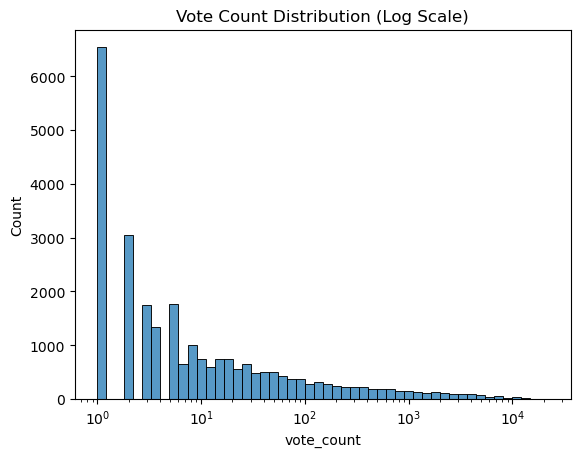

In [30]:
sns.histplot(df.vote_count, bins=50, log_scale=True)
plt.title("Vote Count Distribution (Log Scale)")
plt.show()


### Popularity Distribution (Log Scale)

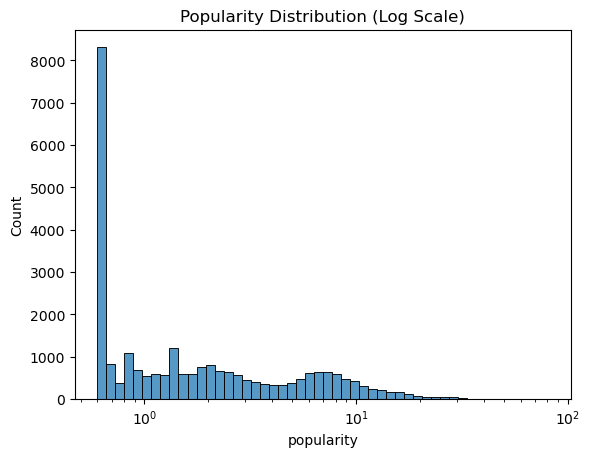

In [31]:
sns.histplot(df.popularity, bins=50, log_scale=True)
plt.title("Popularity Distribution (Log Scale)")
plt.show()


### Top 10 Most Frequent Genre IDs

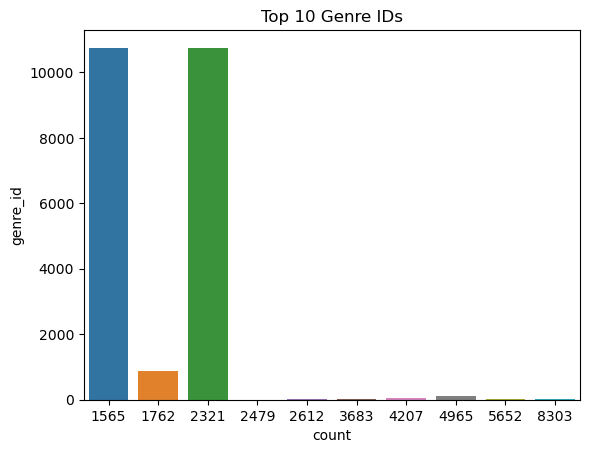

In [32]:
genre_counts = Counter(df["genre_ids"].explode())
top_genres = pd.DataFrame(genre_counts.items(), columns=["genre_id", "count"]).sort_values(by="count", ascending=False).head(10)

sns.barplot(x="count", y="genre_id", data=top_genres)
plt.title("Top 10 Genre IDs")
plt.show()


### Most Frequent Genres Over Time

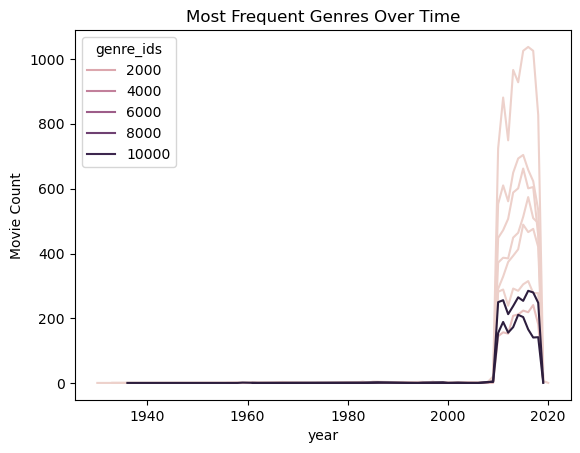

In [33]:
df["year"] = df["release_date"].dt.year
df_exploded = df.explode("genre_ids")
genre_trends = df_exploded.groupby(["year", "genre_ids"]).size().reset_index(name="movie_count")

top_genre_ids = top_genres["genre_id"].values
filtered = genre_trends[genre_trends["genre_ids"].isin(top_genre_ids)]

sns.lineplot(data=filtered, x="year", y="movie_count", hue="genre_ids")
plt.title("Most Frequent Genres Over Time")
plt.ylabel("Movie Count")
plt.show()


 ## Visual Insights (as shown in the plots)
### 1. Vote Averages tend to cluster between 5 and 7.5, with a slight tail toward 8–10.

### 2. Vote Counts are heavily skewed—most movies get fewer than 100 votes, while a few blockbusters get tens of thousands.

### 3. Popularity is also highly skewed, with most films being obscure and a few very popular.

### 4. Genres like Drama and Comedy dominate the dataset.

# Get Average vote by genre over time

In [35]:
# Calculate average vote_average by genre over time
# Step 1: Ensure release year is extracted
df['year'] = df['release_date'].dt.year
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018


In [38]:
# Step 2: Explode genre_ids to create one row per genre per movie
df_exploded = df.explode('genre_ids').dropna(subset=['genre_ids', 'year'])
df_exploded

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
...,...,...,...,...,...,...,...,...,...,...
26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018
26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018
26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018
26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,2018


In [41]:
# Step 3: Group by year and genre, then calculate average vote
avg_vote_by_genre_year = (
    df_exploded.groupby(['year', 'genre_ids'])['vote_average']
    .mean()
    .reset_index(name='avg_vote')
)
avg_vote_by_genre_year

,year,genre_ids,avg_vote
0,1930,18,7.800000
1,1930,10752,7.800000
2,1933,27,5.600000
3,1933,53,5.600000
4,1936,18,8.700000
...,...,...,...
476,2019,10402,7.233333
477,2019,10749,5.680000
478,2019,10751,5.000000
479,2020,27,0.000000


In [42]:
# Step 4: Plot top 5 genres with most movies
top_genres_ids = df_exploded['genre_ids'].value_counts().head(5).index
top_genres_ids

Index([18, 35, 99, 53, 27], dtype='object', name='genre_ids')

In [43]:
# Filter for plotting
plot_data = avg_vote_by_genre_year[avg_vote_by_genre_year['genre_ids'].isin(top_genres_ids)]
plot_data

,year,genre_ids,avg_vote
0,1930,18,7.800000
2,1933,27,5.600000
3,1933,53,5.600000
4,1936,18,8.700000
5,1936,35,8.700000
...,...,...,...
466,2019,27,5.414286
468,2019,35,6.441667
471,2019,53,5.700000
473,2019,99,7.428571


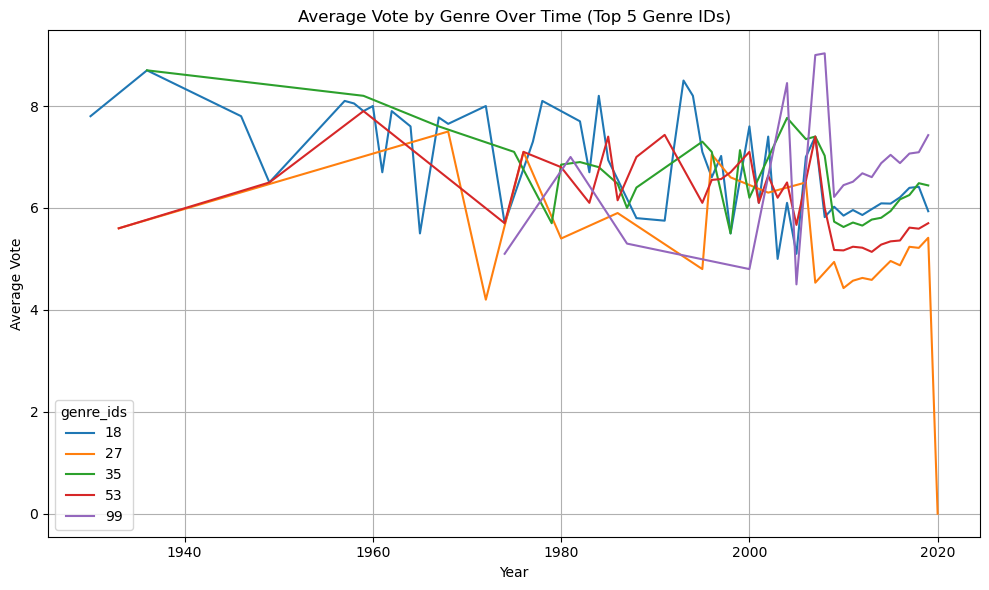

In [44]:
# Step 5: Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='year', y='avg_vote', hue='genre_ids', palette='tab10')
plt.title('Average Vote by Genre Over Time (Top 5 Genre IDs)')
plt.ylabel('Average Vote')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
plot_data.head(10)

,year,genre_ids,avg_vote
0,1930,18,7.80
2,1933,27,5.60
3,1933,53,5.60
4,1936,18,8.70
5,1936,35,8.70
7,1946,18,7.80
10,1949,18,6.50
11,1949,53,6.50
13,1957,18,8.10
15,1958,18,8.05
